0. Initializing Notebook

In [3]:
import pandas as pd
file_path = "C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\TED\\TED_FLAT.csv"
df = pd.read_csv(file_path)


C:\Users\afont\AppData\Local\Temp\ipykernel_7132\3503118717.py:3: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import json
import plotly.graph_objects as go

In [5]:
print(df.columns)

Index(['ID_NOTICE_CAN', 'TED_NOTICE_URL', 'YEAR', 'ID_TYPE', 'DT_DISPATCH',
       'XSD_VERSION', 'CANCELLED', 'CORRECTIONS', 'B_MULTIPLE_CAE', 'CAE_NAME',
       'CAE_NATIONALID', 'CAE_ADDRESS', 'CAE_TOWN', 'CAE_POSTAL_CODE',
       'CAE_GPA_ANNEX', 'ISO_COUNTRY_CODE', 'ISO_COUNTRY_CODE_GPA',
       'B_MULTIPLE_COUNTRY', 'ISO_COUNTRY_CODE_ALL', 'CAE_TYPE',
       'EU_INST_CODE', 'MAIN_ACTIVITY', 'B_ON_BEHALF',
       'B_INVOLVES_JOINT_PROCUREMENT', 'B_AWARDED_BY_CENTRAL_BODY',
       'TYPE_OF_CONTRACT', 'B_FRA_AGREEMENT', 'FRA_ESTIMATED',
       'B_DYN_PURCH_SYST', 'CPV', 'MAIN_CPV_CODE_GPA', 'B_GPA', 'GPA_COVERAGE',
       'LOTS_NUMBER', 'VALUE_EURO', 'VALUE_EURO_FIN_1', 'VALUE_EURO_FIN_2',
       'TOP_TYPE', 'B_ACCELERATED', 'OUT_OF_DIRECTIVES',
       'B_ELECTRONIC_AUCTION', 'NUMBER_AWARDS'],
      dtype='object')


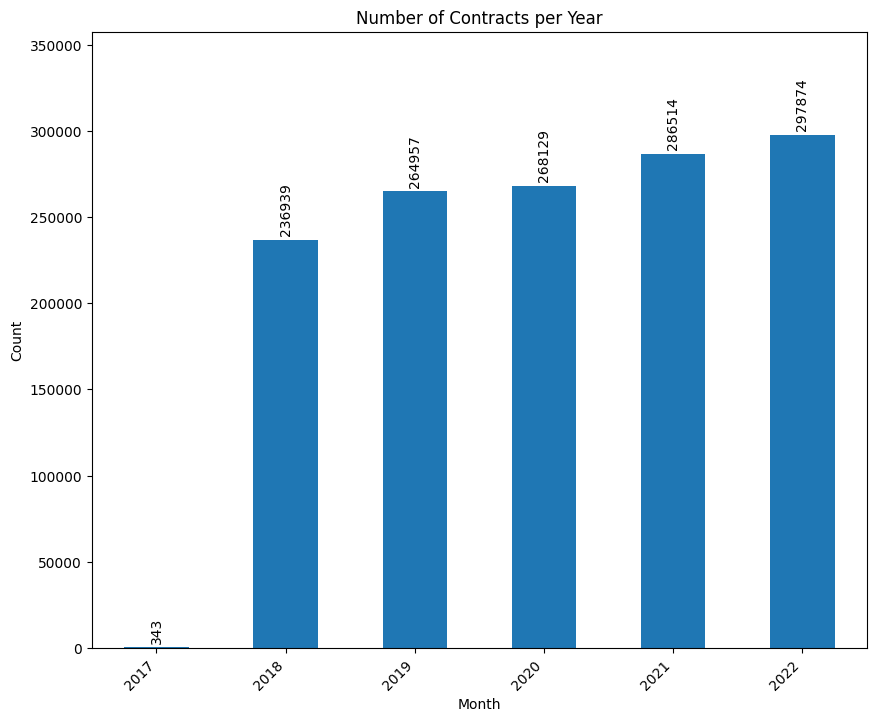

In [4]:
df['DT-DISPATCH'] = pd.to_datetime(df['DT_DISPATCH'])  # Convert column to datetime type


# Group data by month and count occurrences
df['DT-DISPATCH'] = pd.to_datetime(df['DT-DISPATCH'])  # Convert column to datetime type

# Group data by month and count occurrences
monthly_counts = df.groupby(df['DT-DISPATCH'].dt.to_period('Y')).size()

# Plotting counts of occurrences per month
fig, ax = plt.subplots(figsize=(10, 8))

# Create bar plot for monthly counts
bars = monthly_counts.plot(kind='bar', ax=ax)

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Number of Contracts per Year')

# Customize x-axis labels to display month-year format
labels = [str(month) for month in monthly_counts.index]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Annotate each bar with its count value
for bar, count in zip(bars.patches, monthly_counts.values):
    ax.annotate(f'{count}', 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), rotation=90,
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.ylim(0, monthly_counts.max() * 1.2)
plt.show()

1. Statistics

In [7]:

variables = ['VALUE_EURO', 'VALUE_EURO_FIN_1', 'VALUE_EURO_FIN_2']

stats=[]
for variable in variables:
    data = df[variable]
    # Calculate the statistics
    mean=np.mean(data)
    std=np.std(data)

    stats.append([variable,
                data.count(),
  #             sum(1 for x in data if x < 0),
                sum(1 for x in data if x <= 100),
                sum(1 for x in data if x >=10**10),
                np.isnan(data).sum(),
   #            np.isinf(data).sum(),
                mean,
                std,
    #           sum(1 for x in data if x > mean + 3 * std
    ])
stats_df = pd.DataFrame(stats, columns=["Variable", 
                                        "Total Count", 
                                        #"Number of Negative Values",
                                        "<=100 Count",
                                        ">=10,000M Count", 
                                        "NaN Count", 
                                        #"Number of Infinite Values", 
                                        "Mean", 
                                        "Standard Deviation"
                                        #,"Number of Outliers"
                                        ])


# Print the results DataFrame
stats_df_txt = pd.DataFrame()
cols=["Total Count",  "<=100 Count",">=10,000M Count",  "NaN Count"]
stats_df_txt[ cols] = stats_df[cols].applymap(lambda x: "{:,}".format(x))
cols=["Mean", "Standard Deviation"]
stats_df_txt[ cols] = stats_df[cols].applymap(lambda x: "{:,.0f} M €".format(x/1000000))
display(stats_df_txt)

# fig, ax = plt.subplots(figsize=(16, 1))
# ax.axis('tight')
# ax.axis('off')
# table=ax.table(cellText=stats_df.values,
#          colLabels=stats_df.columns,
#          loc='center',
#          cellLoc='right',)
# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.scale(1.2, 1.2) 
# ax.axis('off')
# # Showing the plot (optional)
# plt.show()

,Total Count,<=100 Count,">=10,000M Count",NaN Count,Mean,Standard Deviation
0,"1,438,942","119,532",121,"221,284",275 M €,"49,610 M €"
1,"1,442,018","126,698",88,"218,208",249 M €,"48,027 M €"
2,"1,442,018","127,381",22,"218,208",25 M €,"14,448 M €"


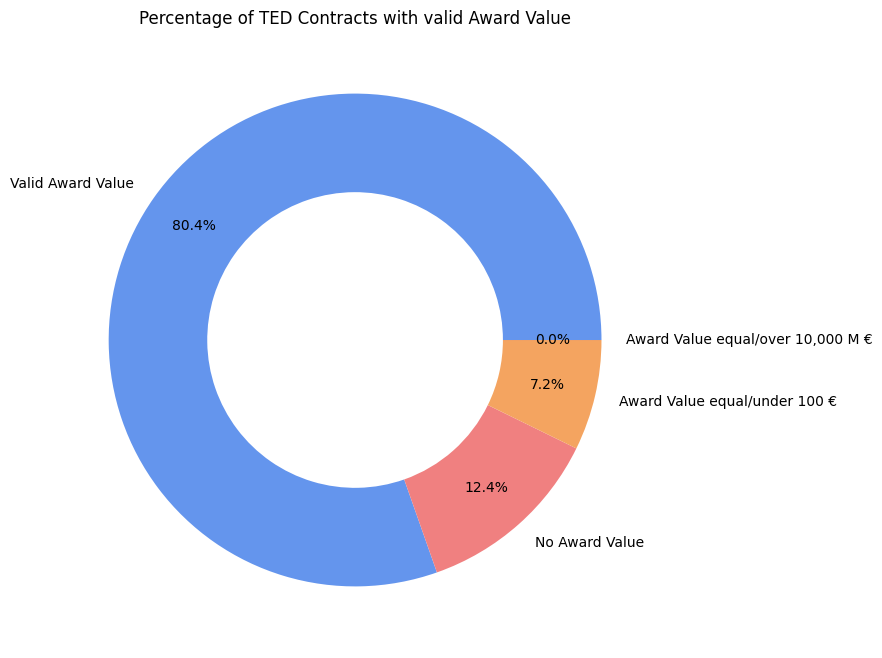

In [8]:
stacked_data = stats_df.loc[2, ["Total Count",  "NaN Count",  "<=100 Count",">=10,000M Count"]]
labels=['Valid Award Value','No Award Value','Award Value equal/under 100 €','Award Value equal/over 10,000 M €']
colors = ['cornflowerblue', 'lightcoral', 'sandybrown',  'purple']
plt.figure(figsize=(8, 8))
plt.pie(stacked_data, labels=labels, wedgeprops=dict(width=0.4), autopct='%1.1f%%',colors=colors, pctdistance=0.8)
plt.title('Percentage of TED Contracts with valid Award Value')
plt.show()

In [9]:

selected_countries = ['AT', 'BE', 'ES', 'FR', 'SE', 'SK', 'IT', 'MT', 'PT', 'RO', 'HU', 'GR']
aggregated_df =df[df['ISO_COUNTRY_CODE'].isin(selected_countries)]
aggregated_df = aggregated_df.groupby('ISO_COUNTRY_CODE').agg(count=('VALUE_EURO', 'count'),
    nancount= ('VALUE_EURO', lambda x: np.isnan(x).sum()),
    lowcount= ('VALUE_EURO', lambda x: np.sum(x <= 100)),
    highcount= ('VALUE_EURO', lambda x: np.sum(x >= 10**10)),
                                                  sum=('VALUE_EURO', 'sum'),
                                                  mean=('VALUE_EURO', 'mean'),
                                                  std=('VALUE_EURO', 'std'))
results=aggregated_df.copy()
cols=["count"]
results[ cols] = results[cols].applymap(lambda x: "{:,}".format(x))
cols=["sum", "mean","std"]
results[ cols] = results[cols].applymap(lambda x: "{:,.0f} M €".format(x/1000000))
display(results)

,count,nancount,lowcount,highcount,sum,mean,std
ISO_COUNTRY_CODE,,,,,,,
AT,"14,719",3471,134,0,"86,663 M €",6 M €,51 M €
BE,"18,073",4336,476,0,"84,133 M €",5 M €,44 M €
ES,"86,752",11072,1465,2,"392,291 M €",5 M €,320 M €
FR,"166,737",18556,3381,29,"64,869,337 M €",389 M €,"55,471 M €"
GR,"13,994",1888,26,0,"27,800 M €",2 M €,27 M €
HU,"15,924",3098,22,1,"93,002 M €",6 M €,168 M €
IT,"46,059",6262,172,0,"440,633 M €",10 M €,84 M €
MT,"2,428",777,16,0,"3,073 M €",1 M €,5 M €
PT,"16,638",1365,341,0,"38,942 M €",2 M €,30 M €


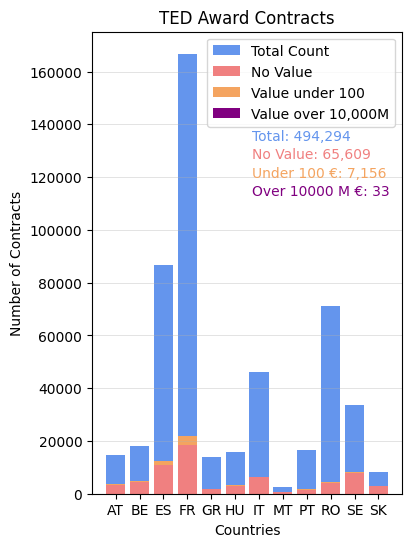

In [10]:
plt.figure(figsize=(4,6))


plt.bar(aggregated_df.index, aggregated_df['count'], color='cornflowerblue', label='Total Count')
bottom=0
plt.bar(aggregated_df.index, aggregated_df['nancount'], color='lightcoral', bottom=bottom, label='No Value')
bottom += aggregated_df['nancount']
plt.bar(aggregated_df.index, aggregated_df['lowcount'], color='sandybrown', bottom=bottom, label='Value under 100')
bottom += aggregated_df['lowcount']
plt.bar(aggregated_df.index, aggregated_df['highcount'], color='purple', bottom=bottom, label='Value over 10,000M')

plt.legend()
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Contracts')
plt.title('TED Award Contracts')

text_sum='{:,.0f}'.format(aggregated_df['count'].sum())
text_sum2='{:,.0f}'.format(aggregated_df['nancount'].sum())
text_sum3='{:,.0f}'.format(aggregated_df['lowcount'].sum())
text_sum4='{:,.0f}'.format(aggregated_df['highcount'].sum())

plt.text(5.7, 134000, 'Total: '+ text_sum, ha='left',color='cornflowerblue')
plt.text(5.7, 127000, 'No Value: '+ text_sum2, ha='left',color='lightcoral')
plt.text(5.7, 120000, 'Under 100 €: '+ text_sum3, ha='left',color='sandybrown')
plt.text(5.7, 113000, 'Over 10000 M €: '+ text_sum4, ha='left',color='purple')
plt.show()

1. General Distribution and Filtering

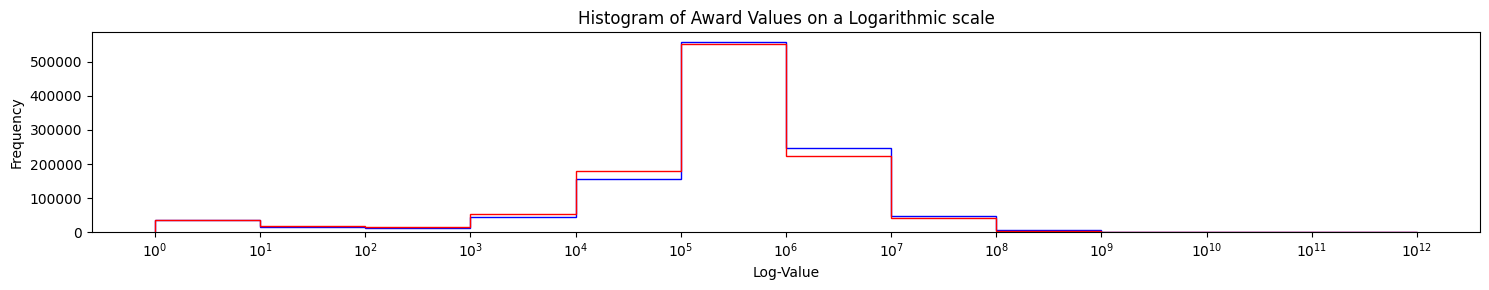

In [11]:
plt.figure(figsize=(15, 3))



colors = ['blue', 'red', 'red']  # Define colors for each variable
labels = ['blue: VALUE_EURO', 'red: VALUE_EURO_FIN_1']  # Define legend labels

for i, variable in enumerate(variables[:2]):
    data = df[variable].dropna()  # Drop NaN values from the data
    max_value = max(data)
    bins = [10**i for i in range(0, int(np.ceil(np.log10(max_value))))]
    plt.hist(data, bins, histtype='step', color=colors[i], stacked=True, fill=False, label=labels[i])
plt.xscale('log')
plt.xticks(bins, ['${}$'.format(int(tick)) for tick in bins])

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '$10^{{{}}}$'.format(int(np.log10(x)))))

plt.xlabel('Log-Value')
plt.ylabel('Frequency')
plt.title('Histogram of Award Values on a Logarithmic scale')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


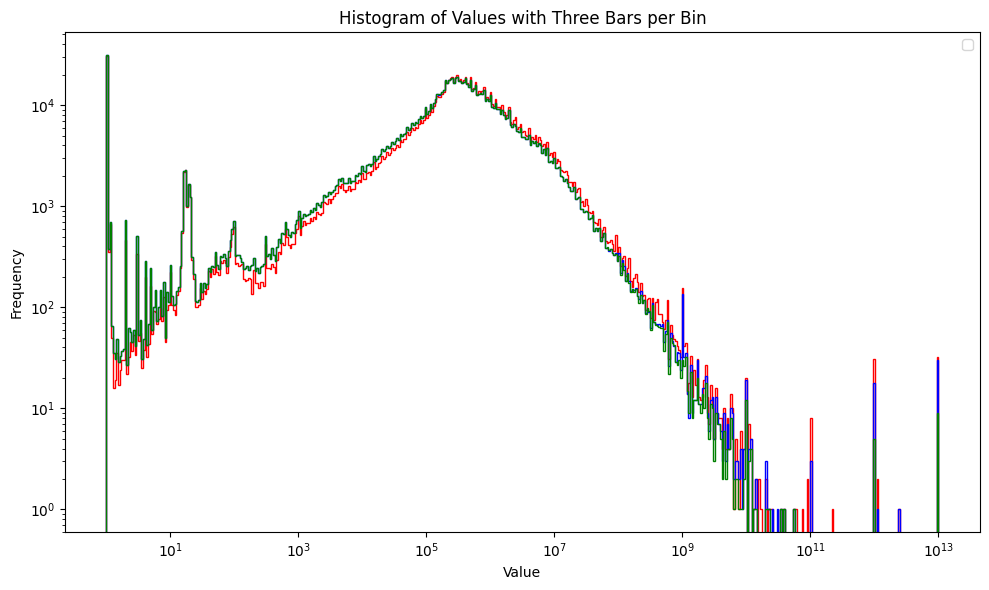

In [20]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']  # Define colors for each variableD

for i, variable in enumerate(variables):
    data = df[variable].dropna()  # Drop NaN values from the data
    max_value = max(data)
    bins = [0]+np.logspace(np.log10(1), np.log10(max_value), num=500)
    plt.hist(data, bins, histtype='step', color=colors[i], stacked=True, fill=False)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values with Three Bars per Bin')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

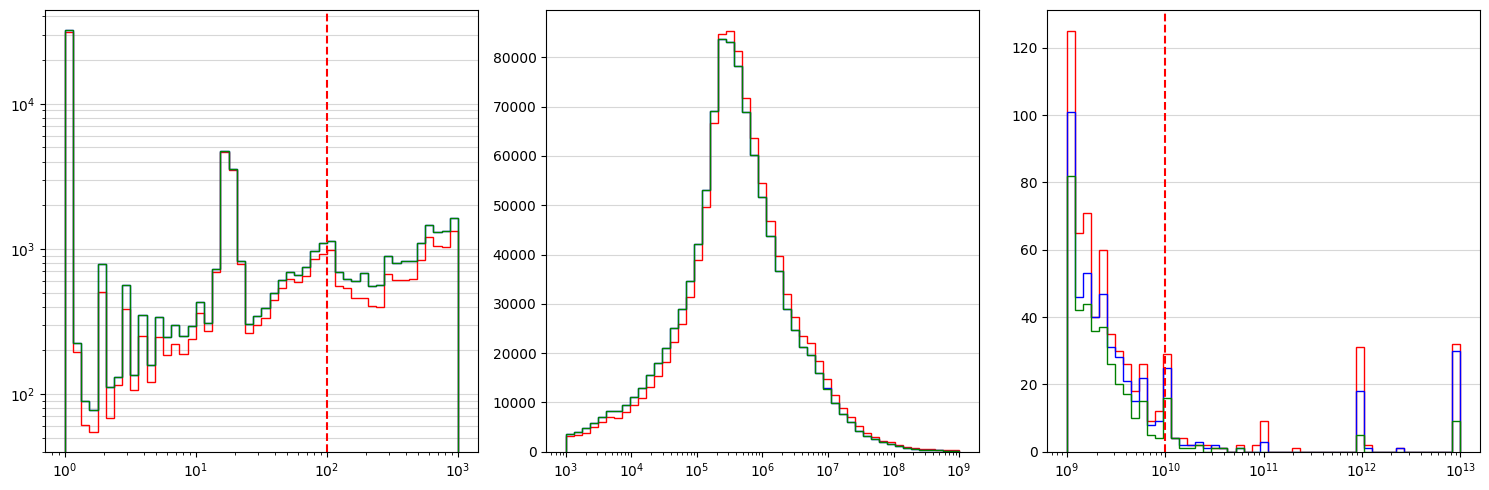

In [23]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green']  # Define colors for each variable
labels = ['red: VALUE_EURO', 'blue: VALUE_EURO_FIN_1','green: VALUE_EURO_FIN_2']  # Define legend labels
num_bins = 50
ranges_dict = {
    0: (0, 1000),
    1: (1000, 10**9),
    2: (10**9,  df[variables].dropna().max().max())
}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for j,ax in enumerate(axes):

# Create bins in an exponential scale
        
    min_value = ranges_dict[j][0]
    max_value = ranges_dict[j][1]
    if min_value==0:
        bins = [0]+np.logspace(np.log10(1), np.log10(max_value), num=num_bins-1)
    else:
        bins = np.logspace(np.log10(min_value), np.log10(max_value), num=num_bins)
    for i,variable in enumerate(variables):
        data = [x for x in df[variable].dropna()if x < ranges_dict[j][1]] if j == 0 else \
            [x for x in df[variable].dropna() if ranges_dict[j][0] <= x < ranges_dict[j][1]] if j == 1 else \
            [x for x in df[variable].dropna() if x >= ranges_dict[j][0]]
        ax.hist(data, bins=bins,histtype='step', color=colors[i], stacked=True, fill=False, label=labels[i])
    
    ax.set_xscale('log')
    if j==0:
        ax.set_yscale('log')
        ax.axvline(x=100, linestyle='--', color='red')  
    if j==2:
        ax.axvline(x=10**10, linestyle='--', color='red') 
    ax.yaxis.grid(True,which='both', alpha=0.5)  # Show vertical grid lines
plt.tight_layout()
plt.show()

C:\Users\afont\AppData\Local\Temp\ipykernel_2980\3329942451.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0, 10**10)  # Setting x-axis limit
C:\Users\afont\AppData\Local\Temp\ipykernel_2980\3329942451.py:27: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0, 10**10)  # Setting x-axis limit


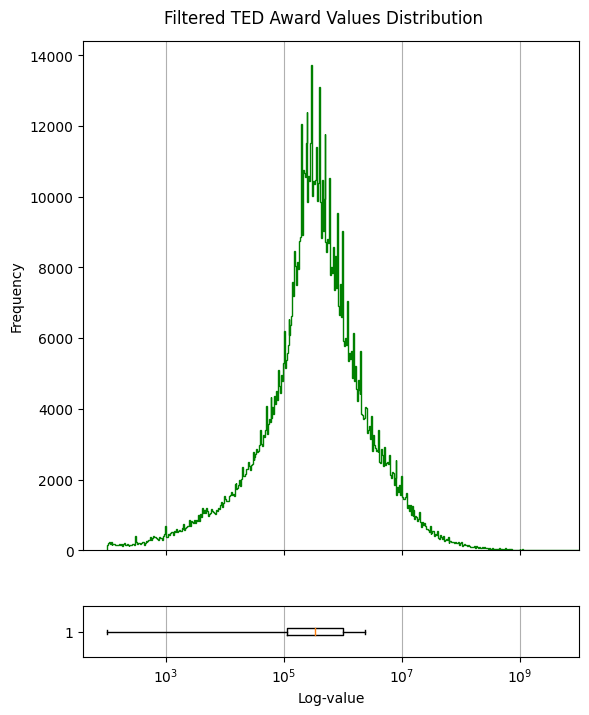

In [24]:
filt_data = df[(df['VALUE_EURO_FIN_2'] > 100) & (df['VALUE_EURO_FIN_2'] < 10**10)]


# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [10, 1]})

# Define bins for histogram
bins = np.logspace(np.log10(min(filt_data['VALUE_EURO_FIN_2'])), np.log10(max(filt_data['VALUE_EURO_FIN_2'])), num=500)

# Plot histogram on ax1
ax1.hist(filt_data['VALUE_EURO_FIN_2'], bins=bins, histtype='step', stacked=True, fill=False,color='green')

plt.suptitle('Filtered TED Award Values Distribution', y=0.92)
ax1.set_xscale('log')

ax1.set_xlim(0, 10**10)  # Setting x-axis limit
ax1.set_ylabel('Frequency')

ax1.grid(True)  # Show vertical grid lines
ax1.yaxis.grid(False)
# Adjust figure height
fig.set_figheight(8)

# Plot boxplot on ax2
ax2.boxplot(filt_data['VALUE_EURO_FIN_2'].values, vert=False, showfliers=False)
ax2.set_xscale('log')
ax2.set_xlim(0, 10**10)  # Setting x-axis limit
ax2.set_xlabel('Log-value')
ax2.grid(True)  # Show vertical grid lines
ax2.yaxis.grid(False)
# Show plot
plt.show()

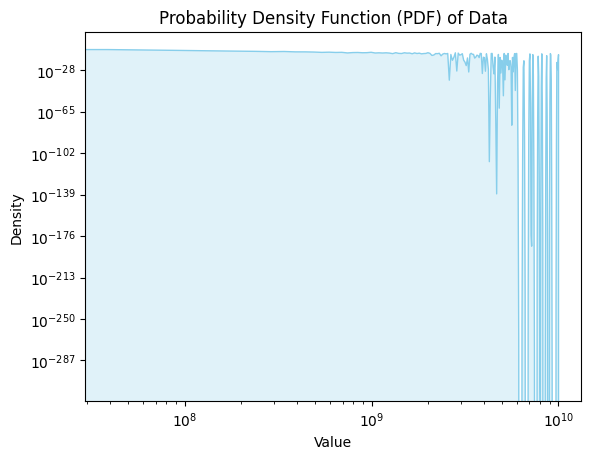

In [25]:

sns.kdeplot(filt_data['VALUE_EURO_FIN_2'], color='skyblue', fill=True)
plt.title('Probability Density Function (PDF) of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.yscale('log')
plt.xscale('log')
plt.show()

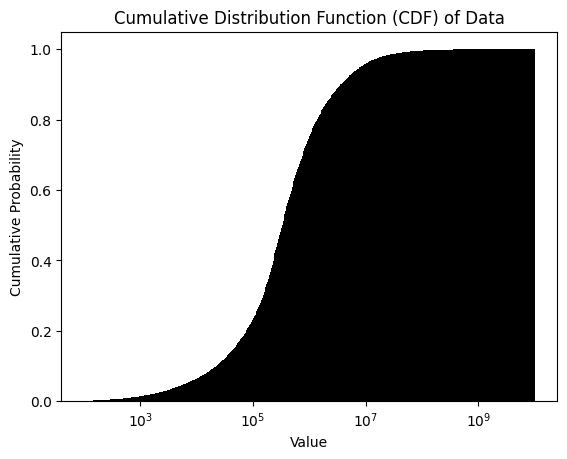

In [26]:
bins = np.logspace(np.log10(min(filt_data['VALUE_EURO_FIN_2'])), np.log10(max(filt_data['VALUE_EURO_FIN_2'])), num=500)
plt.hist(filt_data['VALUE_EURO_FIN_2'], bins=bins, cumulative=True, density=True, color='black')
plt.title('Cumulative Distribution Function (CDF) of Data')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.xscale('log')
plt.show()

2. Results

In [27]:

selected_countries = ['AT', 'BE', 'ES', 'FR', 'SE', 'SK', 'IT', 'MT', 'PT', 'RO', 'HU', 'GR']
aggregated_df =filt_data[filt_data['ISO_COUNTRY_CODE'].isin(selected_countries)]
aggregated_df = aggregated_df.groupby('ISO_COUNTRY_CODE').agg(count=('VALUE_EURO_FIN_2', 'count'),
                                                  sum=('VALUE_EURO_FIN_2', 'sum'),
                                                  mean=('VALUE_EURO_FIN_2', 'mean'),
                                                  std=('VALUE_EURO_FIN_2', 'std'))


results=aggregated_df.copy()
cols=["count"]
results[ cols] = results[cols].applymap(lambda x: "{:,}".format(x))
cols=["sum", "mean","std"]
results[ cols] = results[cols].applymap(lambda x: "{:,.0f} M €".format(x/1000000))
display(results)

,count,sum,mean,std
ISO_COUNTRY_CODE,,,,
AT,"14,456","79,418 M €",5 M €,50 M €
BE,"17,557","77,411 M €",4 M €,42 M €
ES,"86,627","223,850 M €",3 M €,36 M €
FR,"163,030","882,005 M €",5 M €,111 M €
GR,"14,056","23,738 M €",2 M €,18 M €
HU,"15,901","71,246 M €",4 M €,34 M €
IT,"46,139","338,036 M €",7 M €,63 M €
MT,"2,410","3,001 M €",1 M €,5 M €
PT,"16,299","24,618 M €",2 M €,9 M €


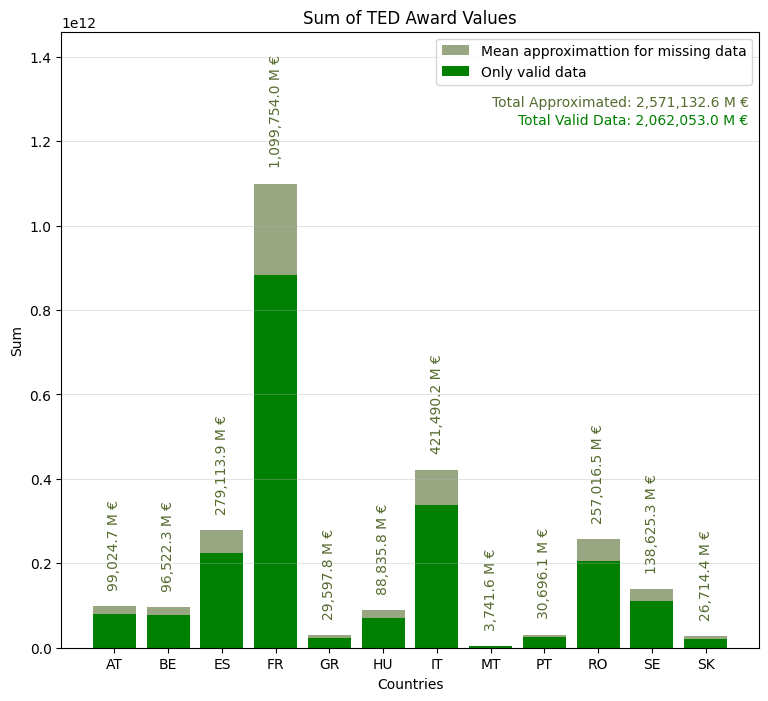

In [28]:
plt.figure(figsize=(9,8))
bigger_bar_data = aggregated_df['sum'] * 1.24688  

plt.bar(aggregated_df.index, bigger_bar_data, label='Mean approximattion for missing data',color='darkolivegreen',alpha=0.6)  # Use alpha to distinguish
plt.bar(aggregated_df.index, aggregated_df['sum'], label='Only valid data',color='green')
# Calculate new data for the bigger bar (19.8% bigger)

plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Sum')
plt.title('Sum of TED Award Values')
plt.ylim(1,10.32**12)
for i in range(len(bigger_bar_data)):
    euro_value = bigger_bar_data[i] / 1000000  # Convert to millions of euros
    euro_string = '{:,.1f} M €'.format(euro_value)  # Format with commas and "M €"
    plt.text(i, bigger_bar_data[i] + 9.3**11, euro_string, ha='center', rotation=90,color='darkolivegreen')
# Add legend
plt.legend()
text_sum='{:,.1f} M €'.format(aggregated_df['sum'].sum()/1000000)
text_approximation='{:,.1f} M €'.format(aggregated_df['sum'].sum()/1000000* 1.24688)
plt.text(11.8, 10.21**12, 'Total Approximated: '+ text_approximation, ha='right',color='darkolivegreen')
plt.text(11.8, 10.18**12, 'Total Valid Data: '+text_sum , ha='right',color='green')
plt.show()

3. Available TED Estimations

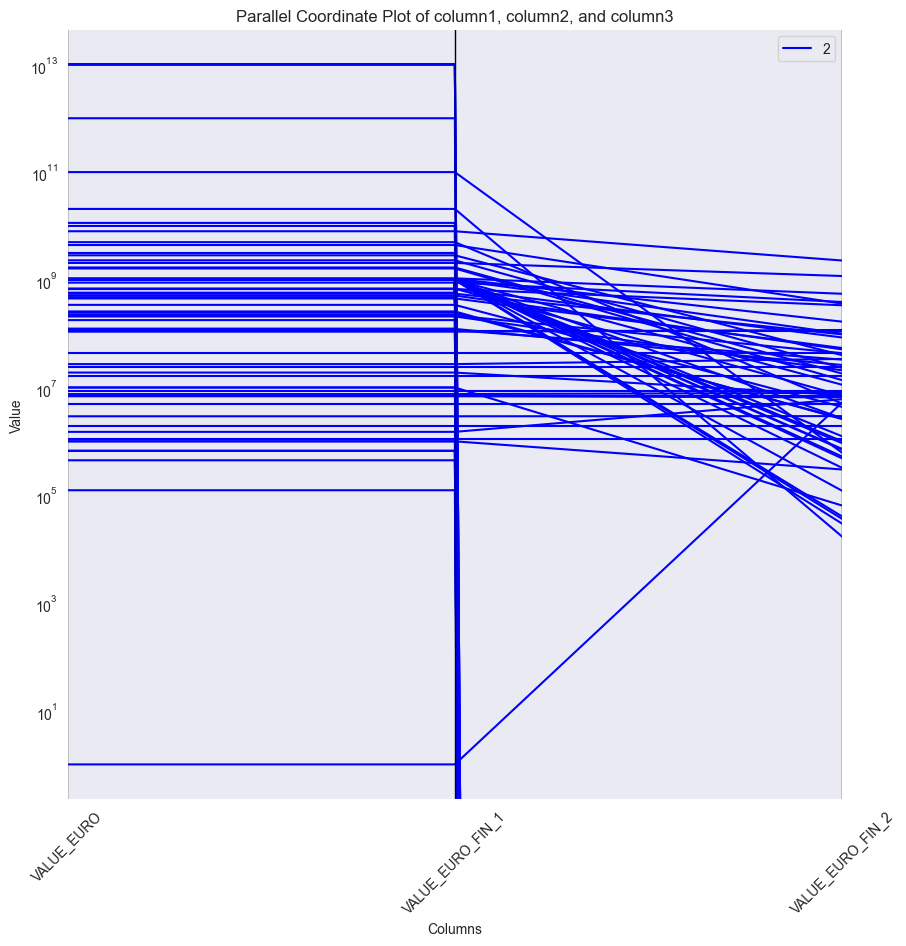

In [10]:

data=df[variables].fillna(-1)
datatoplot = df.copy()
datatoplot['UNEQUAL'] = datatoplot.apply(lambda row: 
    1 if (row[variables[0]] != row[variables[1]]) else (2 if (row[variables[1]] != row[variables[2]]) else 0),
    axis=1)
plt.figure(figsize=(10,10))
pd.plotting.parallel_coordinates(datatoplot[datatoplot['UNEQUAL']>1].head(100),class_column='UNEQUAL', cols=variables,color=['blue','green'],alpha=1)
plt.title('Parallel Coordinate Plot of column1, column2, and column3')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show(

In [5]:
variables=['VALUE_EURO','VALUE_EURO_FIN_1','VALUE_EURO_FIN_2']
groups=['nan','low','high','valid']
def condition(group):
    if group == 'nan':
        return df.isnull()
    elif group == 'low':
        return (df <= 100) & (~df.isnull())
    elif group == 'high':
        return (df >= 10**10) & (~df.isnull())
    elif group == 'valid':
        return (df > 100) & (df < 10**10) & (~df.isnull())

df_partitions = pd.DataFrame()
for var in variables: #First loop generates boolean columns based on the 4 conditions of pertenence to the 4 partition groups
    for g1 in groups:
        colname = f"{var}:{g1}" 
        if g1 == 'nan':
            df_partitions[colname]=df[var].isnull()
        elif g1 == 'low':
            df_partitions[colname]=(df[var] <= 100) & (~df[var].isnull())
        elif g1 == 'high':
            df_partitions[colname]= (df[var] >= 10**10) & (~df[var].isnull())
        elif g1 == 'valid':
            df_partitions[colname]= (df[var] > 100) & (df[var] < 10**10) & (~df[var].isnull())
print(df_partitions.sum())

flows = {}
for i in range(len(variables) - 1): #Second loop calculates flows between groups. That is, for each pair of consecutive variables it calculates the amount of rows that are in group 1 of the first variable and group 2 of the second variable.
    for g1 in groups:
        for g2 in groups:
            temp=df_partitions[f"{variables[i]}:{g1}"] & df_partitions[f"{variables[i+1]}:{g2}"]
            name = f"{variables[i]}:{g1}->{variables[i+1]}:{g2}"
            flows[name] = temp.sum()
# flows_json_serializable = {key: int(value) if isinstance(value, np.int64) else value for key, value in flows.items()}
# print(json.dumps(flows_json_serializable, indent=4))


VALUE_EURO:nan             183343
VALUE_EURO:low             100084
VALUE_EURO:high               109
VALUE_EURO:valid          1071220
VALUE_EURO_FIN_1:nan       180533
VALUE_EURO_FIN_1:low       105517
VALUE_EURO_FIN_1:high          79
VALUE_EURO_FIN_1:valid    1068627
VALUE_EURO_FIN_2:nan       180533
VALUE_EURO_FIN_2:low       105896
VALUE_EURO_FIN_2:high          31
VALUE_EURO_FIN_2:valid    1068296
dtype: int64


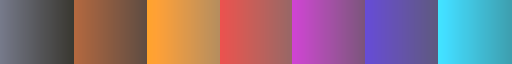

In [18]:
from omccolors import omccolors

from matplotlib.colors import ListedColormap, Normalize,rgb2hex
##choose matplotlib colormap you want to use:
# Viridis: "viridis"
# Plasma: "plasma"
# ...
omc_colors = ['#6A6C71','#A06547','#F9A042','#D85E5B','#B453BB','#565ABE','#01D2EF']
cmap = ListedColormap(omc_colors)

#data_min, data_max: minimum and maximum values of your data
min_value,max_value=(np.min([flows[x] for x in flows.keys()]), np.max([flows[x] for x in flows.keys()]))
(colormap, min_exp, max_exp) = omccolors.generate_omc(min_value,max_value, cmap)
colormap


[array([0.2602819 , 0.86785623, 1.        , 1.        ]), array([0.59833776, 0.37636502, 0.25581899, 1.        ]), array([0.46366186, 0.47920151, 0.54360454, 1.        ]), array([0.81738338, 0.26363206, 0.83388794, 1.        ]), array([0.46314494, 0.33195344, 0.26022795, 1.        ]), array([0.3801616 , 0.34279573, 0.56169752, 1.        ]), array([0.46366186, 0.47920151, 0.54360454, 1.        ]), array([0.9225667 , 0.32184595, 0.30986187, 1.        ]), array([0.46366186, 0.47920151, 0.54360454, 1.        ]), array([0.33020875, 0.33110938, 0.34242807, 1.        ]), array([0.98186595, 0.62648789, 0.22669092, 1.        ]), array([0.4868072 , 0.3398349 , 0.25965602, 1.        ]), array([0.46366186, 0.47920151, 0.54360454, 1.        ]), array([0.69338434, 0.30647802, 0.70227196, 1.        ]), array([0.46366186, 0.47920151, 0.54360454, 1.        ]), array([0.24027026, 0.6240847 , 0.68730636, 1.        ]), array([0.2602819 , 0.86785623, 1.        , 1.        ]), array([0.46366186, 0.47920151,

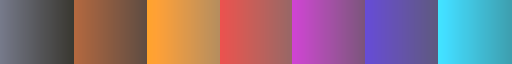

In [31]:
import plotly.graph_objects as go
import plotly.colors as pc
from matplotlib.colors import ListedColormap, Normalize,rgb2hex


string_to_index = {string: index for index, string in enumerate(df_partitions.columns)} #Dictionaries for mapping between partition names and indexes
index_to_string = {index: string for index, string in enumerate(df_partitions.columns)}

def get_source(flow_key): #Splits the flow key name to get the source, then looks in the previous dict for its index
  return string_to_index[flow_key.split("->")[0]] 

def get_target(flow_key): #Splits the flow key name to get the target, then looks in the previous dict for its index
  return string_to_index[flow_key.split("->")[1]]
color_labels=["gray","palegoldenrod","tomato","cornflowerblue"]

omc_colors = ['#ffffe0', '#ffe4b5', '#ffdab9', '#ff6347', '#ff7f50', '#ffa07a', 
              '#f08080', '#cd5c5c', '#dc143c', '#b22222', '#8b0000']
log_values = [np.log10(flows[x]) if flows[x] > 0 else 0 for x in flows.keys()]
cmap = ListedColormap(omc_colors)
norm = Normalize(vmin=min(log_values), vmax=max(log_values))
normalized_values = [norm(value) for value in log_values]
colors = [colormap(normalized_values)]


colors = [color for sublist in colors for color in sublist]
print(colors)
hex_colors = [rgb2hex(color) for color in colors]





fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 50,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [index_to_string[i] for i in range(len(df_partitions.columns))],
      color = color_labels*4,
      hovertemplate='%{label} %{customdata}<extra></extra>',
      customdata=df_partitions.sum()
    ),
    link = dict(
      source = [get_source(x) for x in flows.keys()], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [get_target(x) for x in flows.keys()],
      value = log_values,
      hovertemplate='Flow: %{customdata:.2f}<extra></extra>',
      customdata=[flows[x] for x in flows.keys()]
      #,  color=hex_colors
  ))])




fig.update_layout(
    title_text="Basic Sankey Diagram",
    font_size=14,  # Adjust the font size for better readability
    width=1000,  # Set the width of the figure (in pixels)
    height=1000,  # Set the height of the figure (in pixels)
)
fig.show()
colormap

4. Digit Nonsense

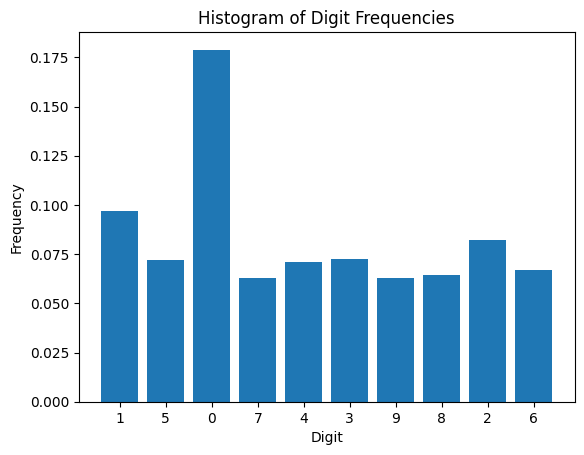

In [125]:
numbers_str = df['VALUE_EURO'].astype(str).str.cat()

# Count the frequency of each digit
digit_freq = {}
for digit in numbers_str:
    if digit.isdigit():
        digit_freq[digit] = digit_freq.get(digit, 0) + 1/len(numbers_str)

# Plot the histogram
plt.bar(digit_freq.keys(), digit_freq.values())
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Histogram of Digit Frequencies')
plt.show()

In [144]:
outliers = []
frequencies =[]

# Total number of digits in all values of the column
total_digits = len(df['VALUE_EURO'].astype(str).str.cat())
# Iterate over each digit
for digit in range(10):  # Assuming digits range from 0 to 9
    outliers_dig=[]
    digit_freq = 0  # Initialize digit frequency counter for each digit
    
    # Iterate over each value in the DataFrame
    for value in df['VALUE_EURO']:
        # Convert value to string and count appearance of digit
        digit_freq += str(value).count(str(digit))
    
    # Calculate the mean digit frequency
    mean_digit_freq = digit_freq / total_digits
    frequencies.append(mean_digit_freq)
    print(str(digit)+" - "+str(mean_digit_freq))
    # Iterate over each value again to check if digit frequency is above mean
    for value in df['VALUE_EURO']:
        # Convert value to string and count appearance of digit
        digit_count = str(value).count(str(digit))
        digit_freq_ratio = digit_count / len(str(value))
        
        # Check if digit frequency is above mean digit frequency
        if digit_freq_ratio > mean_digit_freq:
            outliers_dig.append(value)
    outliers.append(outliers_dig)


0 - 0.17885733654885538
1 - 0.09677749695412201
2 - 0.08236002990400115
3 - 0.07258432661993683
4 - 0.0708037275237201
5 - 0.0720965733737439
6 - 0.06696371491269924
7 - 0.06282994964141832
8 - 0.0645417542036163
9 - 0.06300537570316612


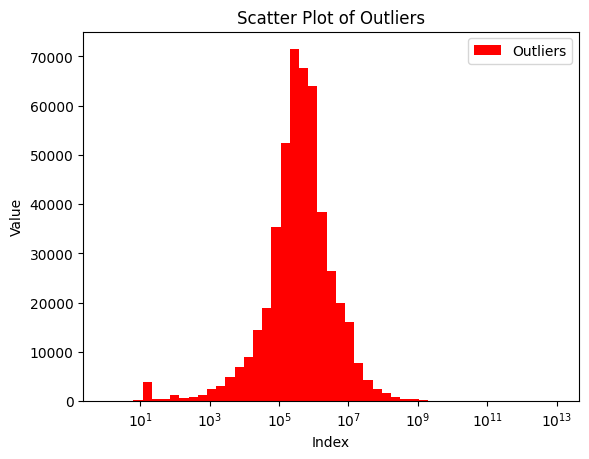

In [147]:
bins = np.logspace(np.log10(1), np.log10(10000000000000), num=50)
# Plot the scatter plot
plt.hist( outliers[9],bins=bins, color='red', label='Outliers')
plt.xscale('log')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Outliers')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

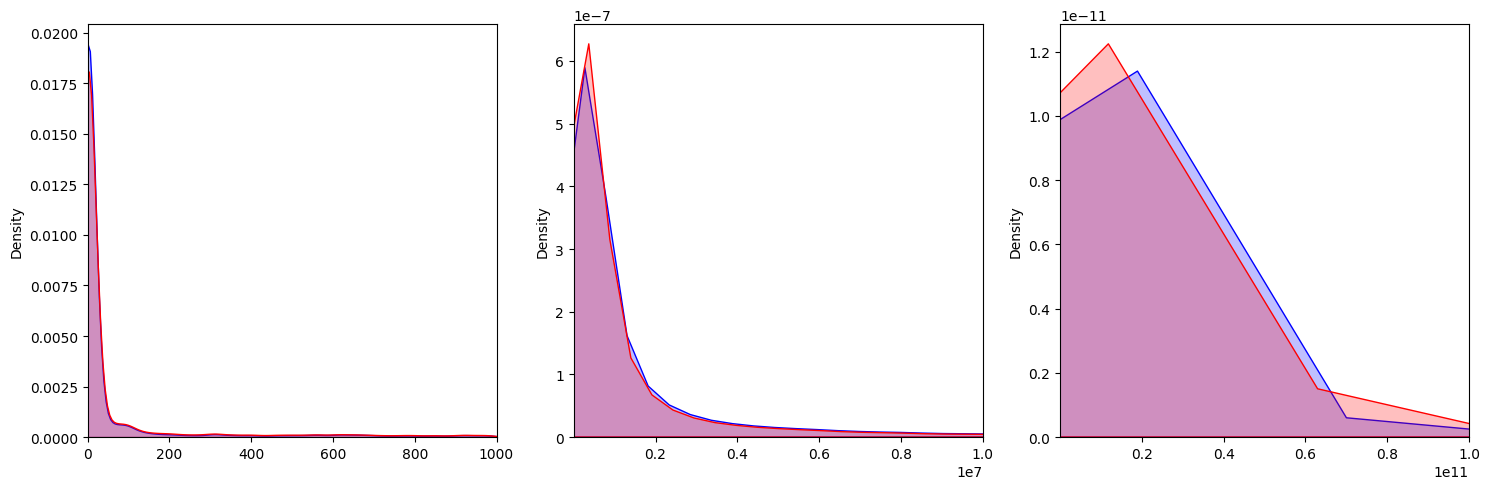

In [70]:
plt.figure(figsize=(10, 6))



colors = ['blue', 'red', 'salmon']  # Define colors for each variable
labels = ['blue: VALUE_EURO', 'red: VALUE_EURO_FIN_1']  # Define legend labels

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for j,ax in enumerate(axes):
    if j == 0:
        ax.set_xlim(0, 1000) 
    elif j == 1:
        ax.set_xlim(1000, 10000000) 
    else:
        ax.set_xlim(10000000, 100000000000) 
    for i, variable in enumerate(variables[:2]):
        data = [x for x in df[variable].dropna() if x < 1000] if j == 0 else \
           [x for x in df[variable].dropna() if 1000 <= x < 100000000] if j == 1 else \
           [x for x in df[variable].dropna() if x >= 10000000]
        sns.kdeplot(data, color=colors[i], fill=True, ax=ax)

plt.tight_layout()
plt.show()